# Alloy4Fun Data

## Import Data

In [137]:
import pandas as pd, os 

def importDataFromDir(dir):
    # Import all the data from a directory
    # dir: directory with the data
    # return: a dictionary of dataframes
    dict = {}

    for file in os.listdir(dir):
        if file.endswith('.json'):
            df = pd.read_json(f'{dir}/' + file, lines=True)
            dict[file.removesuffix(".json")[0:3]] = df
            print(f"Imported {file}.")

    return dict

In [138]:
# Import files from the data directory
dict = importDataFromDir('data')

Imported 9jPK8KBWzjFmBx4Hb.json.
Imported FwCGymHmbqcziisH5.json.
Imported gAeD3MTGCCv8YNTaK.json.
Imported JC8Tij8o8GZb99gEJ.json.
Imported jyS8Bmceejj9pLbTW.json.
Imported PQAJE67kz8w5NWJuM.json.
Imported sDLK7uBCbgZon3znd.json.
Imported WGdhwKZnCu7aKhXq9.json.
Imported YH3ANm7Y5Qe5dSYem.json.
Imported zoEADeCW2b2suJB2k.json.
Imported zRAn69AocpkmxXZnW.json.


## Data Cleaning

### Remove useless features

In [139]:
dict["9jP"].head()

,_id,cmd_c,cmd_i,cmd_n,code,derivationOf,original,sat,time,msg,theme
0,zKAYz8BCDmHKgNoSx,1.0,7.0,prop8Ok,/**\n * Linear temporal logic revision exercis...,dvhCng5AdxC8MqjFy,9jPK8KBWzjFmBx4Hb,1.0,2020-12-13 23:28:11,NaN,NaN
1,8FmQ9PNWT2SXncTxX,1.0,9.0,prop10Ok,/**\n * Linear temporal logic revision exercis...,5eT7wTw5kT8DwTbu2,9jPK8KBWzjFmBx4Hb,1.0,2019-11-11 21:54:33,NaN,NaN
2,eyGu5DYCrnk58G2fJ,1.0,6.0,prop7Ok,/**\n * Linear temporal logic revision exercis...,niLmMRmm94Hz6ymcD,9jPK8KBWzjFmBx4Hb,1.0,2020-12-1 11:55:11,NaN,NaN
3,Akbr9Aq6WfBLHrvE8,1.0,18.0,prop19Ok,/**\n * Linear temporal logic revision exercis...,DnAm62D7JaqDzyy5y,9jPK8KBWzjFmBx4Hb,1.0,2020-11-26 10:33:29,NaN,NaN
4,MNegade3hLiutxCru,1.0,10.0,prop11Ok,/**\n * Linear temporal logic revision exercis...,cjK4u23ZAfYm8fatA,9jPK8KBWzjFmBx4Hb,1.0,2020-1-19 17:06:22,NaN,NaN


#### cmd_c feature

Counter({1.0: 21234, 0.0: 23})


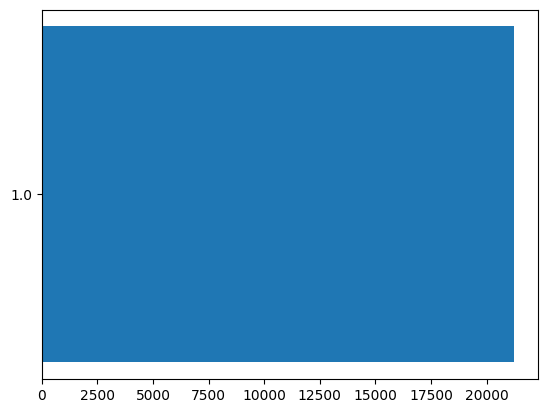

In [140]:
import collections
import matplotlib.pyplot as plt

def countValues(dict, col):
    # Count the values in a column
    # df: dataframe
    # col: column to count
    # return: dataframe with the counts
    totalCount = collections.Counter()

    for df in dict.values():
        count = df[col].value_counts().to_dict()
        totalCount.update(count)        

    return totalCount

# Count the different values in the cmd_c column across all the dataframes
print(countValues(dict, 'cmd_c'))

plt.barh([str(k) for k in counter.keys()], counter.values())
plt.show()


The number of 0 values for the column cmd_c is irrelevant. For that reason, entries with these values should be dropped.

In [141]:
# Remove the rows with the value 0 in the cmd_c column

def operateDFs(dict, op, arg):
    # Apply an operation to all the dataframes in a dictionary
    # dict: dictionary of dataframes
    # op: operation to perform on the dataframes
    # arg: argument to pass to the operation
    # return: dictionary of dataframe with the operation applied
    for v in dict.values():
        op(v, arg)

dropRows = (lambda df, arg: df.drop(df[df[arg] == 0].index, inplace=True))
operateDFs(dict, dropRows, 'cmd_c')

# Count the different valued in the cmd_c column
print(countValues(dict, 'cmd_c'))

Counter({1.0: 21234})


#### original feature

In [142]:
# Count the different values for the original column for each dataframe
countValuesOp = (lambda df, arg: print(df[arg].value_counts().to_dict()))
operateDFs(dict, countValuesOp, 'original')
print("")

{'9jPK8KBWzjFmBx4Hb': 5253}
{'FwCGymHmbqcziisH5': 1247}
{'gAeD3MTGCCv8YNTaK': 2280}
{'JC8Tij8o8GZb99gEJ': 948}
{'jyS8Bmceejj9pLbTW': 658}
{'PQAJE67kz8w5NWJuM': 2857}
{'sDLK7uBCbgZon3znd': 3279}
{'WGdhwKZnCu7aKhXq9': 392}
{'YH3ANm7Y5Qe5dSYem': 4738}
{'zoEADeCW2b2suJB2k': 2597}
{'zRAn69AocpkmxXZnW': 5311}



Every dataframe has the same value for the original column. This column is irrelevant.

#### cmd_n feature

First step is to encode the categorical value.

In [143]:
from sklearn.preprocessing import OrdinalEncoder

# Encode the cmd_n column
enc = OrdinalEncoder()
enc.fit(dict["9jP"]['cmd_n'].values.reshape(-1, 1))
dict["9jP"]["cmd_n"] = enc.transform(dict["9jP"]["cmd_n"].values.reshape(-1, 1))

dict["9jP"].head()
#print(dict["9jP"]["cmd_n"].corr(dict["9jP"]["cmd_i"]))


,_id,cmd_c,cmd_i,cmd_n,code,derivationOf,original,sat,time,msg,theme
0,zKAYz8BCDmHKgNoSx,1.0,7.0,18.0,/**\n * Linear temporal logic revision exercis...,dvhCng5AdxC8MqjFy,9jPK8KBWzjFmBx4Hb,1.0,2020-12-13 23:28:11,NaN,NaN
1,8FmQ9PNWT2SXncTxX,1.0,9.0,0.0,/**\n * Linear temporal logic revision exercis...,5eT7wTw5kT8DwTbu2,9jPK8KBWzjFmBx4Hb,1.0,2019-11-11 21:54:33,NaN,NaN
2,eyGu5DYCrnk58G2fJ,1.0,6.0,17.0,/**\n * Linear temporal logic revision exercis...,niLmMRmm94Hz6ymcD,9jPK8KBWzjFmBx4Hb,1.0,2020-12-1 11:55:11,NaN,NaN
3,Akbr9Aq6WfBLHrvE8,1.0,18.0,9.0,/**\n * Linear temporal logic revision exercis...,DnAm62D7JaqDzyy5y,9jPK8KBWzjFmBx4Hb,1.0,2020-11-26 10:33:29,NaN,NaN
4,MNegade3hLiutxCru,1.0,10.0,1.0,/**\n * Linear temporal logic revision exercis...,cjK4u23ZAfYm8fatA,9jPK8KBWzjFmBx4Hb,1.0,2020-1-19 17:06:22,NaN,NaN


C:\Users\anaio\AppData\Local\Temp\ipykernel_14604\2548704399.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dict["9jP"].corr()


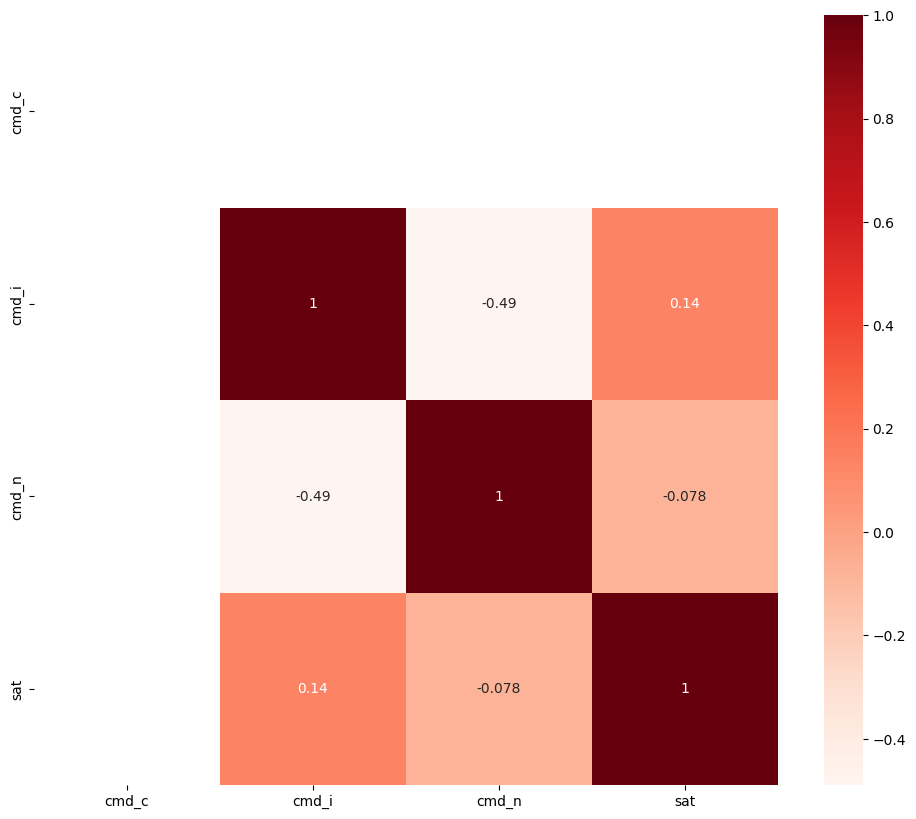

Now we will drop the irrelevant columns. 

In [103]:
# Drop columns that are not needed
dropColOp = (lambda df, arg: df.drop(columns=arg, axis=1, inplace=True))
operateDFs(dict, dropColOp, ["cmd_c", "original", "time", "msg", "theme"])

dict["9jP"].head()

,_id,cmd_i,cmd_n,code,derivationOf,sat
0,zKAYz8BCDmHKgNoSx,7.0,prop8Ok,/**\n * Linear temporal logic revision exercis...,dvhCng5AdxC8MqjFy,1.0
1,8FmQ9PNWT2SXncTxX,9.0,prop10Ok,/**\n * Linear temporal logic revision exercis...,5eT7wTw5kT8DwTbu2,1.0
2,eyGu5DYCrnk58G2fJ,6.0,prop7Ok,/**\n * Linear temporal logic revision exercis...,niLmMRmm94Hz6ymcD,1.0
3,Akbr9Aq6WfBLHrvE8,18.0,prop19Ok,/**\n * Linear temporal logic revision exercis...,DnAm62D7JaqDzyy5y,1.0
4,MNegade3hLiutxCru,10.0,prop11Ok,/**\n * Linear temporal logic revision exercis...,cjK4u23ZAfYm8fatA,1.0
